In [1]:
import numpy as np
import h5py
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import gridspec
plt.rc('text', usetex=True)


import glob
import os
import pickle
import sys

from astropy.table import Table

# sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
# from functions import *

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
Illustris_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_stellarmaps_orig_11.2.hdf5'
TNG_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'

In [8]:
#mass bins
m1_bin=[12,12.5]
m2_bin=[12.5,13.5]
m3_bin=[13.5,15]

# HSC

# Illustris 

In [3]:
sim_file = Illustris_file_quick

f = h5py.File(sim_file, 'r')
cat_sh_mstar = np.array(f['catsh_SubhaloMassType'][:, 4])
cat_sh_m_dm = np.array(f['catsh_SubhaloMassType'][:, 1])
# cen_insitu = np.array(f['map_star_rho_insitu_xy'])
# cen_exsitu = np.array(f['map_star_rho_exsitu_xy'])
# map_stars_cen = cen_exsitu + cen_insitu

# fuzz_insitu = np.array(f['map_star_rho_fuzz_insitu_xy'])
# fuzz_exsitu = np.array(f['map_star_rho_fuzz_exsitu_xy'])
# map_stars_fuzz = fuzz_exsitu + fuzz_insitu

# sats_insitu = np.array(f['map_star_rho_oshs_insitu_xy'])
# sats_exsitu = np.array(f['map_star_rho_oshs_exsitu_xy'])
# map_stars_sats = sats_exsitu + sats_insitu

map_size = f['config'].attrs['map_range_min']
n_pixels = f['config'].attrs['map_npixel']
pixel_scale=2 * (map_size/n_pixels)

In [4]:
pixel_scale

5.333333333333333

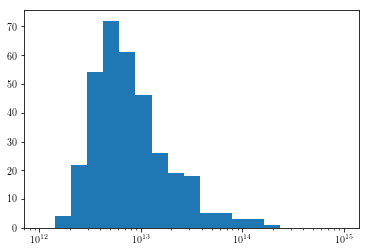

In [5]:
plt.hist(cat_sh_m_dm, bins=np.logspace(12,15,20))
plt.xscale('log')
plt.show()

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=False, figsize=(10*3, 10))
# fig.subplots_adjust(left=0.22, right=0.995, bottom=0.14, top=0.94, wspace=0.00, hspace=0.00)
fig=plt.figure(figsize=(10*6, 10))
gs1 = gridspec.GridSpec(1, 3)
gs1.update(left=0.05, right=0.48, wspace=0.0)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1])
gs2 = gridspec.GridSpec(1, 3)
gs2.update(left=0.05, right=0.48, wspace=0.3)
ax3 = plt.subplot(gs2[0, -1])


######################################################################################################################
# plot
######################################################################################################################
#hsc
ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC')
ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC')
  


for masses, iso in zip(tng_masses, tng_isos):   
    
#     cat_mass = masses[0] 
#     summed_mass = galaxy[2] 
#     fit_mass = iso_tng['mag_tot'][0]/-2.5 
    m_100_1d = masses[5] 
    
    
    if (m_100_1d<11.6) or (m_100_1d>12.0):
        continue

    elif (m_100_1d>=11.6) and (m_100_1d<11.8):
        ngals1+=1

        tng_isos1.append(iso)

        ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2))+ np.log10(0.7 ** 2.0) , linewidth=1.0, c=u'#1f77b4', alpha=0.2, 
                 label='_nolegend_')
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
            
        #cumulative mass  
        ax3.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['growth_ori']), linewidth=1.0, c=u'#1f77b4', alpha=0.2, label='_nolegend_')
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))

        
    elif (m_100_1d>=11.8) and (m_100_1d<12.0):
        ngals2+=1
        
        tng_isos2.append(iso)

        ax2.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2))+ np.log10(0.7 ** 2.0), linewidth=1.0, c=u'#1f77b4', alpha=0.2, 
                 label='_nolegend_')
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))

        #cumulative mass
        ax3.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['growth_ori']), linewidth=1.0, c=u'#1f77b4', alpha=0.2, label='_nolegend_')
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng_isos1, pixel_scale = pixel_scale)
median_sma2, median_mu2 = get_median_profile(tng_isos2, pixel_scale = pixel_scale)
median_sma, median_mu = get_median_profile(tng_isos1+tng_isos2, 
                                           pixel_scale = pixel_scale, quantity='growth_ori')

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG')
ax2.plot(median_sma2, median_mu2+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG')
ax3.plot(median_sma, median_mu, linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG')



print ngals1, ngals2


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(4, 10)
ax2.set_xlim(0.9, 4.5)
ax2.set_ylim(4, 10)
ax3.set_xlim(0.9, 4.5)
ax3.set_ylim(9.5, 12)

# Labels
# ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
#                size=60)
# ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
#                size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30)
ax3.tick_params(axis='both', which='major', labelsize=30)

# #ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)
# ax1.axvline(11.6, linestyle='--', linewidth=4.0, alpha=0.8, zorder=0)

#text label
ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)
ax2.text(1.65, 4.2, r'$11.8<M_{100}<12.0$', size=30)
ax3.text(1.65, 9.6, r'$11.6<M_{100}<12.0$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

x1, x2 = ax2.get_xlim()
ax2_twin = ax2.twiny()
ax2_twin.set_xlim(x1, x2)
ax2_twin.figure.canvas.draw()
ax2_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax2_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax2_twin.tick_params(axis='both', which='major', labelsize=15)
ax2_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

x1, x2 = ax3.get_xlim()
ax3_twin = ax3.twiny()
ax3_twin.set_xlim(x1, x2)
ax3_twin.figure.canvas.draw()
ax3_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax3_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax3_twin.tick_params(axis='both', which='major', labelsize=15)
ax3_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)


######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax2.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_ylabel(r'$M_{\star}( < r ) \: [ \log (M_{\odot})]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax2.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax2.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax3.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax3.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

#plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
#plt.setp(ax2.get_xticklabels()[0], visible=False)

#remove last label in x-axis of ax1 to prevent overlaping of labels with ax2
labels1 = [item.get_text() for item in ax2.get_xticklabels()[:-1]]
ax1.set_xticklabels(labels1)

#add a bit of space between subplots
# plt.tight_layout()

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_TNG.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

# TNG 